## Guided Project - Popular Data Science Questions

In this guided project, we're going to explore the Data Science Stack Exchange (DSSE) [website](https://datascience.stackexchange.com/). 

The DSSE is a specific version of a Stack Exchange site, a group of sites that allow users to ask questions on a specialized topic such as computer programming, math, physics etc. and other users can answer their questions. Users then upvote or downvote answers to ensure that the best answers get recognized.

We want to understand what students are trying to learn in data science. To do that we'll use DSSE to analyze:

* The type of questions students are asking
* The tags associated with the question so we can categorize them
* How many are being asked over time

To gather our data we're going to use the public DSSE [database](https://data.stackexchange.com/datascience/query/new) and limit results to the year 2019.

We'll likely be gathering data from:

* The Posts table
* The Tags table
* The PostTypes table

## Gathering Data

First we'll run our query to get all 2019 data from the DSSE site, which is:

```sql
SELECT
  Id,
  PostTypeId,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
  
FROM Posts

WHERE YEAR(CreationDate) = 2019
AND PostTypeId = 1

```

In [1]:
import pandas as pd

data = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [2]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


## Missing Data & Cleaning Our Data

Our dataset has 8839 rows. We need to clean it for a variety of reasons:

* The FavoriteCount is missing ~7432 rows. Given NaN values for this column are likely indicating the presence of no favoriting, we will set these NaNs to 0.

* We also need to parse out the tags, given the "<" and ">" characters act as a separator, we can put them in a list of strings or something similar

* We can also split out the Creation Date into specific Years and/or months if we prefer to do a time-based analysis

In [3]:
data["FavoriteCount"] = data["FavoriteCount"].fillna(0).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [4]:
data["Tags"] = data["Tags"].str.replace(">", ",")
data["Tags"] = data["Tags"].str.replace("<", "")
data["Tags"] = data["Tags"].str.split(",")

data["Tags"].head()

0                    [machine-learning, data-mining, ]
1    [machine-learning, regression, linear-regressi...
2       [python, time-series, forecast, forecasting, ]
3              [machine-learning, scikit-learn, pca, ]
4           [dataset, bigdata, data, speech-to-text, ]
Name: Tags, dtype: object

## Tag Usage

We're going to determine the most popular tags. We'll do this by looking at:

* The number of times each tag was used
* The number of times each tag was viewed

In [5]:
tag_usage = {}

for row in data["Tags"]:
    for tag in row:
        if tag in tag_usage and tag != "":
            tag_usage[tag] += 1
        elif tag not in tag_usage and tag != "":
            tag_usage[tag] = 1

In [6]:
tag_usage_df = pd.DataFrame.from_dict(tag_usage, orient="index")

tag_usage_df.rename({0:"usage_count"}, axis=1, inplace=True)

tag_usage_df.sort_values(by="usage_count", ascending=False, inplace=True)

In [7]:
tag_usage_df

,usage_count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [8]:
tag_viewing = {}

for idx, row in enumerate(data["Tags"]):
    for tag in row:
        if tag in tag_viewing and tag != "":
            tag_viewing[tag] += data["ViewCount"].iloc[idx]
        elif tag not in tag_viewing and tag != "":
            tag_viewing[tag] = data["ViewCount"].iloc[idx]



In [9]:
tag_viewing_df = pd.DataFrame.from_dict(tag_viewing, orient="index")

tag_viewing_df.rename({0:"viewing_count"}, axis=1, inplace=True)

tag_viewing_df.sort_values(by="viewing_count", ascending=False, inplace=True)

In [10]:
tag_viewing_df.head()

,viewing_count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787


In [11]:
top_25_tag_usage = tag_usage_df.head(25)
top_25_viewing = tag_viewing_df.head(25)

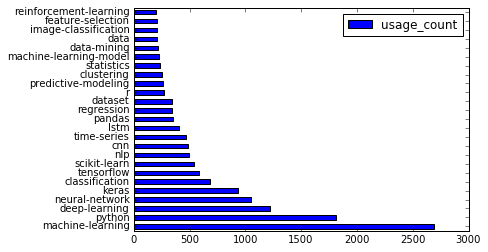

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

top_25_tag_usage.plot(kind="barh")

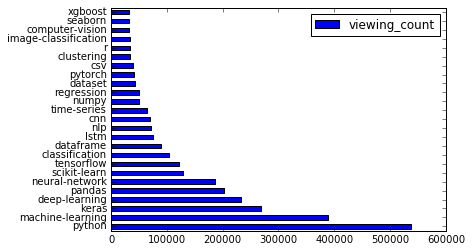

In [13]:
top_25_viewing.plot(kind="barh")

## Results

A lot of the most used tags are also the most viewed tags. There are alot of similarities between the two data frames.

One further step we could take in our analysis would be to:

* See how many times a tag is used in both dataframes 
* See how many tags are used with each other, and create a heatmap of the results

Most of the top 10 tags that are related are either deep learning libraries such as **tensorflow** **scikitlearn** and **keras**, or functions of each of these libraries such as *neural network*, *classification* and *deep learning*.

## Interest Over Time

To check the usage over time, we'll look at the specific creation date over time and the tags associated with the questions.

We'll look at:

* Deep Learning questions asked over time
* The total amount of questions over time
* How many deep learning questions there are relative to the total amount of questions

## Gathering Data

To gather our data we'll use this query from the DSSE website:

```sql
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;

```

In [14]:
all_questions= pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [15]:
all_questions["Tags"] = all_questions["Tags"].str.replace(">", ",")
all_questions["Tags"] = all_questions["Tags"].str.replace("<", "")
all_questions["Tags"] = all_questions["Tags"].str.split(",")

In [16]:
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability, ]"
1,45418,2019-02-12 00:50:39,"[neural-network, ]"
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot, ]"
3,45426,2019-02-12 04:51:49,"[keras, ]"
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [17]:
all_questions["CreationDate"].describe()

count                   21576
unique                  21575
top       2019-09-25 18:32:47
freq                        2
first     2014-05-13 23:58:30
last      2020-01-19 03:01:03
Name: CreationDate, dtype: object

In [18]:
top_25_tag_usage.head(10)

,usage_count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


## Tracking Over Time

Given the creation date goes from May 2014, until 2020, let's track usage over the complete years we have by quarter, so from Q1 2015 until Q4 2019.

We'll use the tags associated with deep learning in our top 10 list as our proxy for interest in deep learning. Specifically we'll use:

* deep-learning
* neural-network
* keras
* tensorflow
* scikit-learn

In [19]:
deep_learning_tags = ["deep-learning", "neural-network",
                      "keras", "tensorflow", "scikit-learn"]

def classify_deep_learning_question(tags):
    for tag in tags:
        if tag in deep_learning_tags:
            return 1
    return 0


In [20]:
all_questions["deep_learning_question"] = all_questions["Tags"].apply(classify_deep_learning_question)

In [21]:
all_questions.head()

,Id,CreationDate,Tags,deep_learning_question
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability, ]",1
1,45418,2019-02-12 00:50:39,"[neural-network, ]",1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot, ]",0
3,45426,2019-02-12 04:51:49,"[keras, ]",1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


In [57]:
import datetime as dt
def determine_quarter(string):
    if string in ("01", "02", "03"):
        return "Q1"
    elif string in ("04", "05", "06"):
        return "Q2"
    elif string in ("07", "08", "09"):
        return "Q3"
    else:
        return "Q4"
    
def determine_quarter_and_year(date):
    year = str(date.strftime("%y"))
    quarter = str(date.strftime("%m"))
    quarter = determine_quarter(quarter)
    return year + "-" + quarter

In [61]:

all_questions["time_period"] = all_questions["CreationDate"].apply(determine_quarter_and_year)

In [62]:
all_questions.head()

,Id,CreationDate,Tags,deep_learning_question,time_period
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability, ]",1,19-Q1
1,45418,2019-02-12 00:50:39,"[neural-network, ]",1,19-Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot, ]",0,19-Q1
3,45426,2019-02-12 04:51:49,"[keras, ]",1,19-Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19-Q1


In [107]:
quarterly = all_questions.groupby("time_period", sort=True).size()
quarterly = quarterly.reset_index()
quarterly.drop("20-Q1",axis=0,inplace=True)
quarterly = quarterly.rename({0:"number_of_questions"},axis=1)

In [109]:
quarterly_ml = all_questions[all_questions["deep_learning_question"]==1]

quarterly_ml = quarterly_ml.groupby("time_period",sort=True).size()
quarterly_ml = quarterly_ml.reset_index()
quarterly_ml.drop("20-Q1",axis=0,inplace=True)
quarterly_ml = quarterly_ml.rename({0:"number_of_questions"},axis=1)

,time_period,number_of_questions
0,14-Q2,157
1,14-Q3,189
2,14-Q4,216
3,15-Q1,190
4,15-Q2,284
5,15-Q3,311
6,15-Q4,382
7,16-Q1,516
8,16-Q2,518
9,16-Q3,585


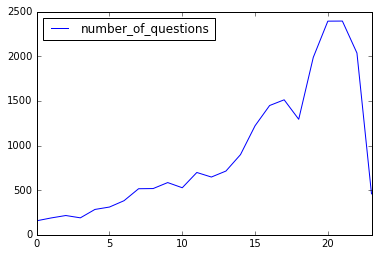

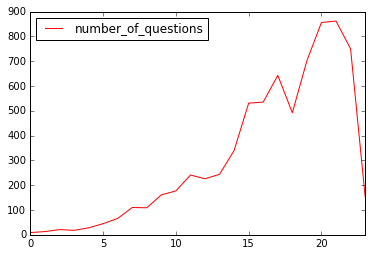

In [126]:
quarterly.plot(kind="line", color="blue")
quarterly_ml.plot(kind="line", color="red")

## Results

As we can see from the two charts above, the total number of deep learning questions is an increasing proportion of the total questions being asked, and are likely a big driver of traffic to the DSSE site.